In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/Users/anilthapa/Downloads/dataset_DT.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no


In [3]:
df.shape

(18423, 17)

It appears that our data has 17 features, which is very high dimensional. The number of records is 18423, which is sufficient.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


#### It appears that three columns `education`, `day` & `month` has missing values.

In [5]:
category = df.select_dtypes('object')
for column in category.columns:
    df[column] = df[column].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        18423 non-null  float64 
 1   job        18423 non-null  category
 2   marital    18423 non-null  category
 3   education  18103 non-null  category
 4   default    18423 non-null  category
 5   balance    18423 non-null  float64 
 6   housing    18423 non-null  category
 7   loan       18423 non-null  category
 8   contact    18423 non-null  category
 9   day        18117 non-null  float64 
 10  month      18109 non-null  category
 11  duration   18423 non-null  float64 
 12  campaign   18423 non-null  float64 
 13  pdays      18423 non-null  float64 
 14  previous   18423 non-null  float64 
 15  poutcome   18423 non-null  category
 16  y          18423 non-null  category
dtypes: category(10), float64(7)
memory usage: 1.2 MB


In [7]:
df['job'].value_counts()

job
management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
unknown           112
Name: count, dtype: int64

In [8]:
df['job'].replace('unknown', np.nan, inplace=True)

In [9]:
df['contact'].value_counts()

contact
cellular     12995
unknown       4313
telephone     1115
Name: count, dtype: int64

In [10]:
df['contact'].replace('unknown', np.nan, inplace = True)

In [11]:
df['contact'].isna().sum()

4313

In [12]:
df.drop('contact',axis =1, inplace=True)

In [13]:
df['pdays'].value_counts()

pdays
-1.0      13254
 182.0      144
 92.0       137
 91.0       116
 181.0      109
          ...  
 791.0        1
 481.0        1
 701.0        1
 413.0        1
 232.0        1
Name: count, Length: 527, dtype: int64

In [14]:
df['pdays'].replace(-1, np.nan, inplace=True)

In [15]:
df.drop(['day', 'month'],axis = 1, inplace=True)

In [16]:
df.pdays.isna().sum()

13254

In [17]:
df.drop('pdays', axis =1, inplace=True)

In [18]:
df.isna().any()

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
duration     False
campaign     False
previous     False
poutcome     False
y            False
dtype: bool

In [19]:
df.shape

(18423, 13)

In [20]:
df['job'].isna().sum()

112

In [21]:
df = df.dropna(subset =['job'])

In [22]:
df.shape

(18311, 13)

In [23]:
df['education'].value_counts()

education
secondary    8980
tertiary     5771
primary      2541
unknown       701
Name: count, dtype: int64

In [24]:
df['education'].replace('unknown', np.nan, inplace = True)

In [25]:
df.isna().any()

age          False
job          False
marital      False
education     True
default      False
balance      False
housing      False
loan         False
duration     False
campaign     False
previous     False
poutcome     False
y            False
dtype: bool

In [26]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [27]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
duration     False
campaign     False
previous     False
poutcome     False
y            False
dtype: bool

In [28]:
df['poutcome'].value_counts()

poutcome
unknown    13175
failure     2779
success     1346
other       1011
Name: count, dtype: int64

In [29]:
df['poutcome'].replace('other', 'unknown', inplace = True)

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


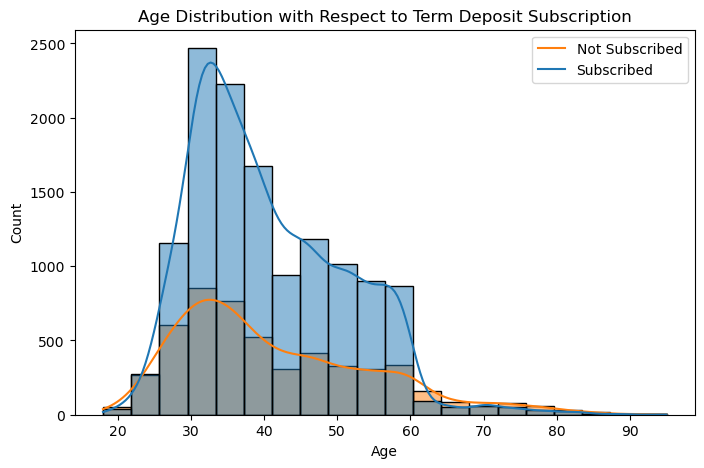

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='y', kde=True, bins=20)
plt.title('Age Distribution with Respect to Term Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not Subscribed', 'Subscribed'])
plt.show()

Age distribution among clients who subscribed and didn't subscribe to term deposit This visualization helps us understand how age is distributed among clients who subscribed and didn't subscribe to the term deposit. It can give insights into whether age plays a role in subscription.

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


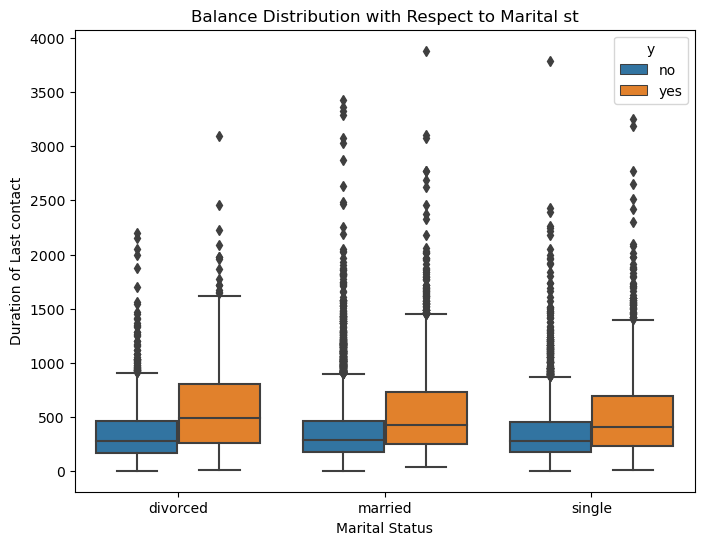

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='marital', y='duration', hue ='y')
plt.title('Balance Distribution with Respect to Marital st')
plt.xlabel('Marital Status')
plt.ylabel('Duration of Last contact')
plt.xticks(ticks=[0, 1, 2])
plt.show()

Balance distribution among clients who subscribed and didn't subscribe to term deposit. This boxplot shows the distribution of account balance among clients who subscribed and didn't subscribe to the term deposit. It helps us understand if there's any difference in account balance
between subscribers and non-subscribers.

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,647.0,2.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,285.0,3.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,1156.0,1.0,3.0,unknown,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,202.0,2.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,263.0,1.0,0.0,unknown,no


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [34]:
for column in df.columns:
    if df[column].dtype =='category':
        df[column] = label_encoder.fit_transform(df[column])

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
0,34.0,1,2,1,0,13408.0,0,0,647.0,2.0,0.0,2,0
1,49.0,4,0,2,0,20727.0,0,0,285.0,3.0,2.0,0,0
2,32.0,7,2,2,0,1743.0,1,0,1156.0,1.0,3.0,2,0
3,46.0,4,0,2,0,10469.0,1,0,202.0,2.0,0.0,2,0
4,26.0,4,2,2,0,7628.0,0,0,263.0,1.0,0.0,2,0


In [36]:
X, y = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'previous', 'poutcome']], df['y']

In [37]:
df[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
23,63.0,6,1,2,0,-39.0,0,0,387.0,2.0,0.0,2,1
32,52.0,4,1,2,0,-2712.0,1,1,253.0,1.0,0.0,2,0
117,45.0,1,1,1,0,-73.0,1,0,551.0,3.0,9.0,0,0
154,27.0,9,2,2,0,-67.0,1,0,604.0,3.0,2.0,0,1
353,26.0,4,2,2,0,-3.0,0,0,1022.0,2.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17695,46.0,9,0,1,0,-90.0,0,1,270.0,1.0,0.0,2,1
17698,36.0,6,2,2,0,-103.0,1,1,3253.0,1.0,0.0,2,1
17774,42.0,0,2,1,0,-247.0,1,1,519.0,1.0,1.0,2,1
18032,31.0,7,2,1,0,-205.0,0,0,481.0,1.0,1.0,0,1


In [38]:
scaler = MinMaxScaler()
X['balance'] = scaler.fit_transform(X['balance'].values.reshape(-1,1))

/var/folders/b3/2_by4h4x5vj2swvvx86hmbw00000gn/T/ipykernel_62479/3787619834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['balance'] = scaler.fit_transform(X['balance'].values.reshape(-1,1))


In [39]:
selector_6_best = SelectKBest(chi2, k = 6)
X_new = selector_6_best.fit_transform(X, y)

In [40]:
selected_indices = np.where(selector_6_best.get_support())[0]
print(selected_indices)

[ 0  1  6  7  8 10]


Here, we can conclude the best top 6 features were: `age`,`job`,`housing`,`loan`,`duration` & `poutcome`

<Axes: >

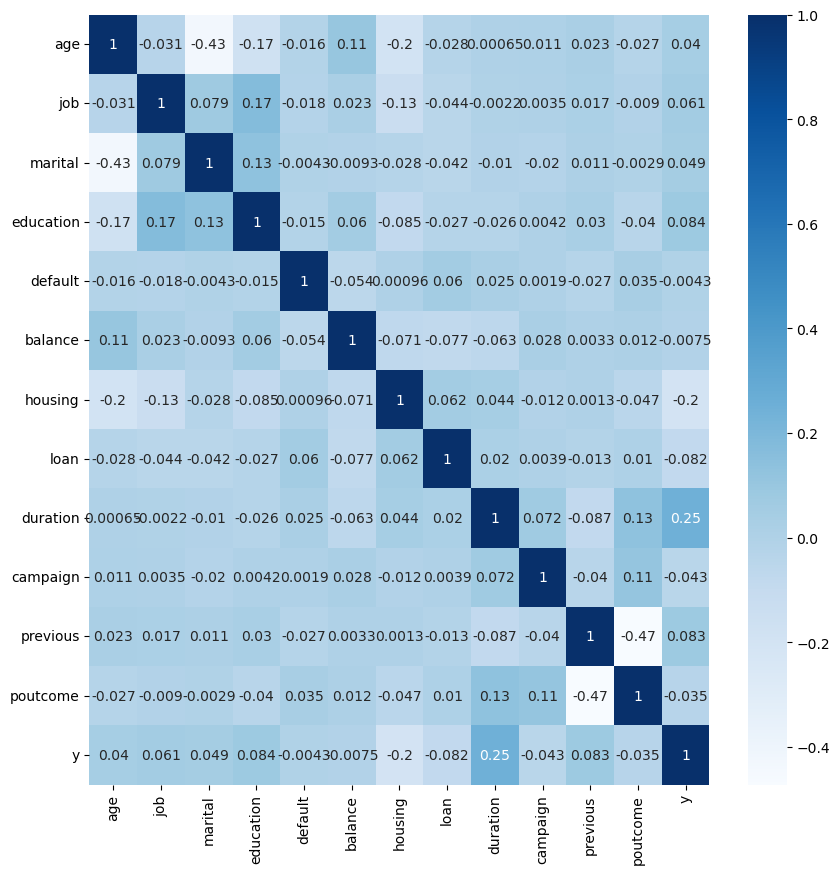

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap ='Blues')

### Train test split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [76]:
decision_tree = DecisionTreeClassifier()

In [77]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_predict = decision_tree.predict(X_test)

In [79]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3260
           1       0.44      0.44      0.44      1318

    accuracy                           0.67      4578
   macro avg       0.60      0.61      0.61      4578
weighted avg       0.68      0.67      0.68      4578



### Initializing Decision Tree Classifier with different criteria

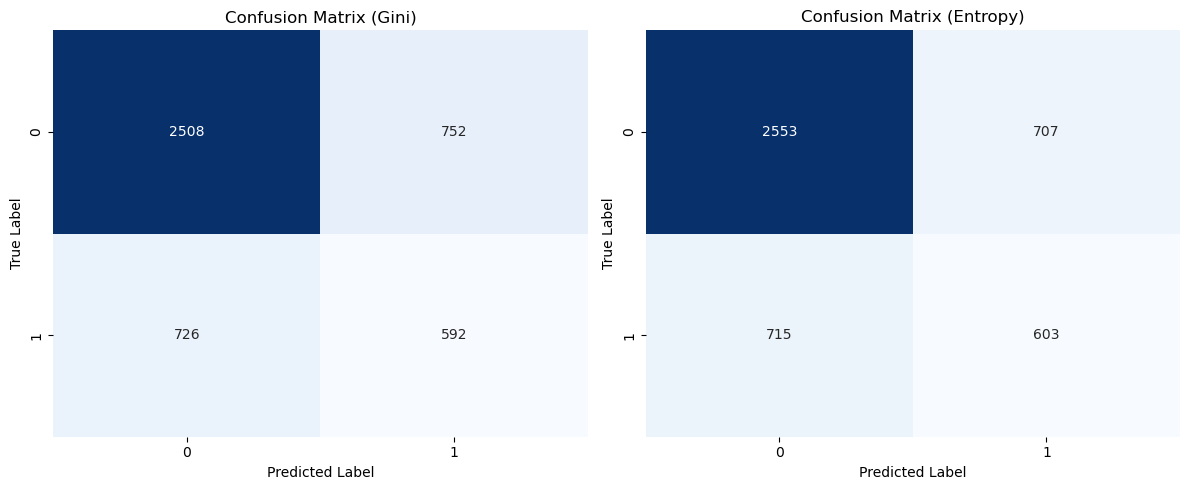

In [80]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Fitting the classifiers
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Predicting on the testing set
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Calculating confusion matrices
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

# Printing confusion matrices with graphical representation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_gini, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_entropy, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

### GridSearch for `max_depth` & `min_samples_per_leaf`

In [81]:
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Try different values for max_depth
    'min_samples_leaf': [1, 5, 10, 20]  # Try different values for min_samples_leaf
}

# Create a Decision Tree classifier
gini_classifier = DecisionTreeClassifier(random_state=42, criterion='gini')

# Perform grid search with cross-validation
grid_search = GridSearchCV(gini_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10, 20]},
             scoring='accuracy')

In [82]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 20}

In [83]:
y_grid_search = grid_search.best_estimator_.predict(X_test)

In [84]:
print(classification_report(y_test, y_grid_search))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3260
           1       0.62      0.42      0.50      1318

    accuracy                           0.76      4578
   macro avg       0.71      0.66      0.67      4578
weighted avg       0.74      0.76      0.74      4578



Here, We can see that our grid search resulted in max depth of 5 and minimum samples per leaf of 10 as the best parameters

## Decision Tree with a depth of 5

In [85]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3260
           1       0.44      0.44      0.44      1318

    accuracy                           0.67      4578
   macro avg       0.60      0.61      0.61      4578
weighted avg       0.68      0.67      0.68      4578



In [86]:
decision_tree_depth_5 = DecisionTreeClassifier(max_depth=5)

In [87]:
decision_tree_depth_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [88]:
y_predict_max_depth_5 = decision_tree_depth_5.predict(X_test)

In [89]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3260
           1       0.44      0.44      0.44      1318

    accuracy                           0.67      4578
   macro avg       0.60      0.61      0.61      4578
weighted avg       0.68      0.67      0.68      4578



IndexError: list index out of range

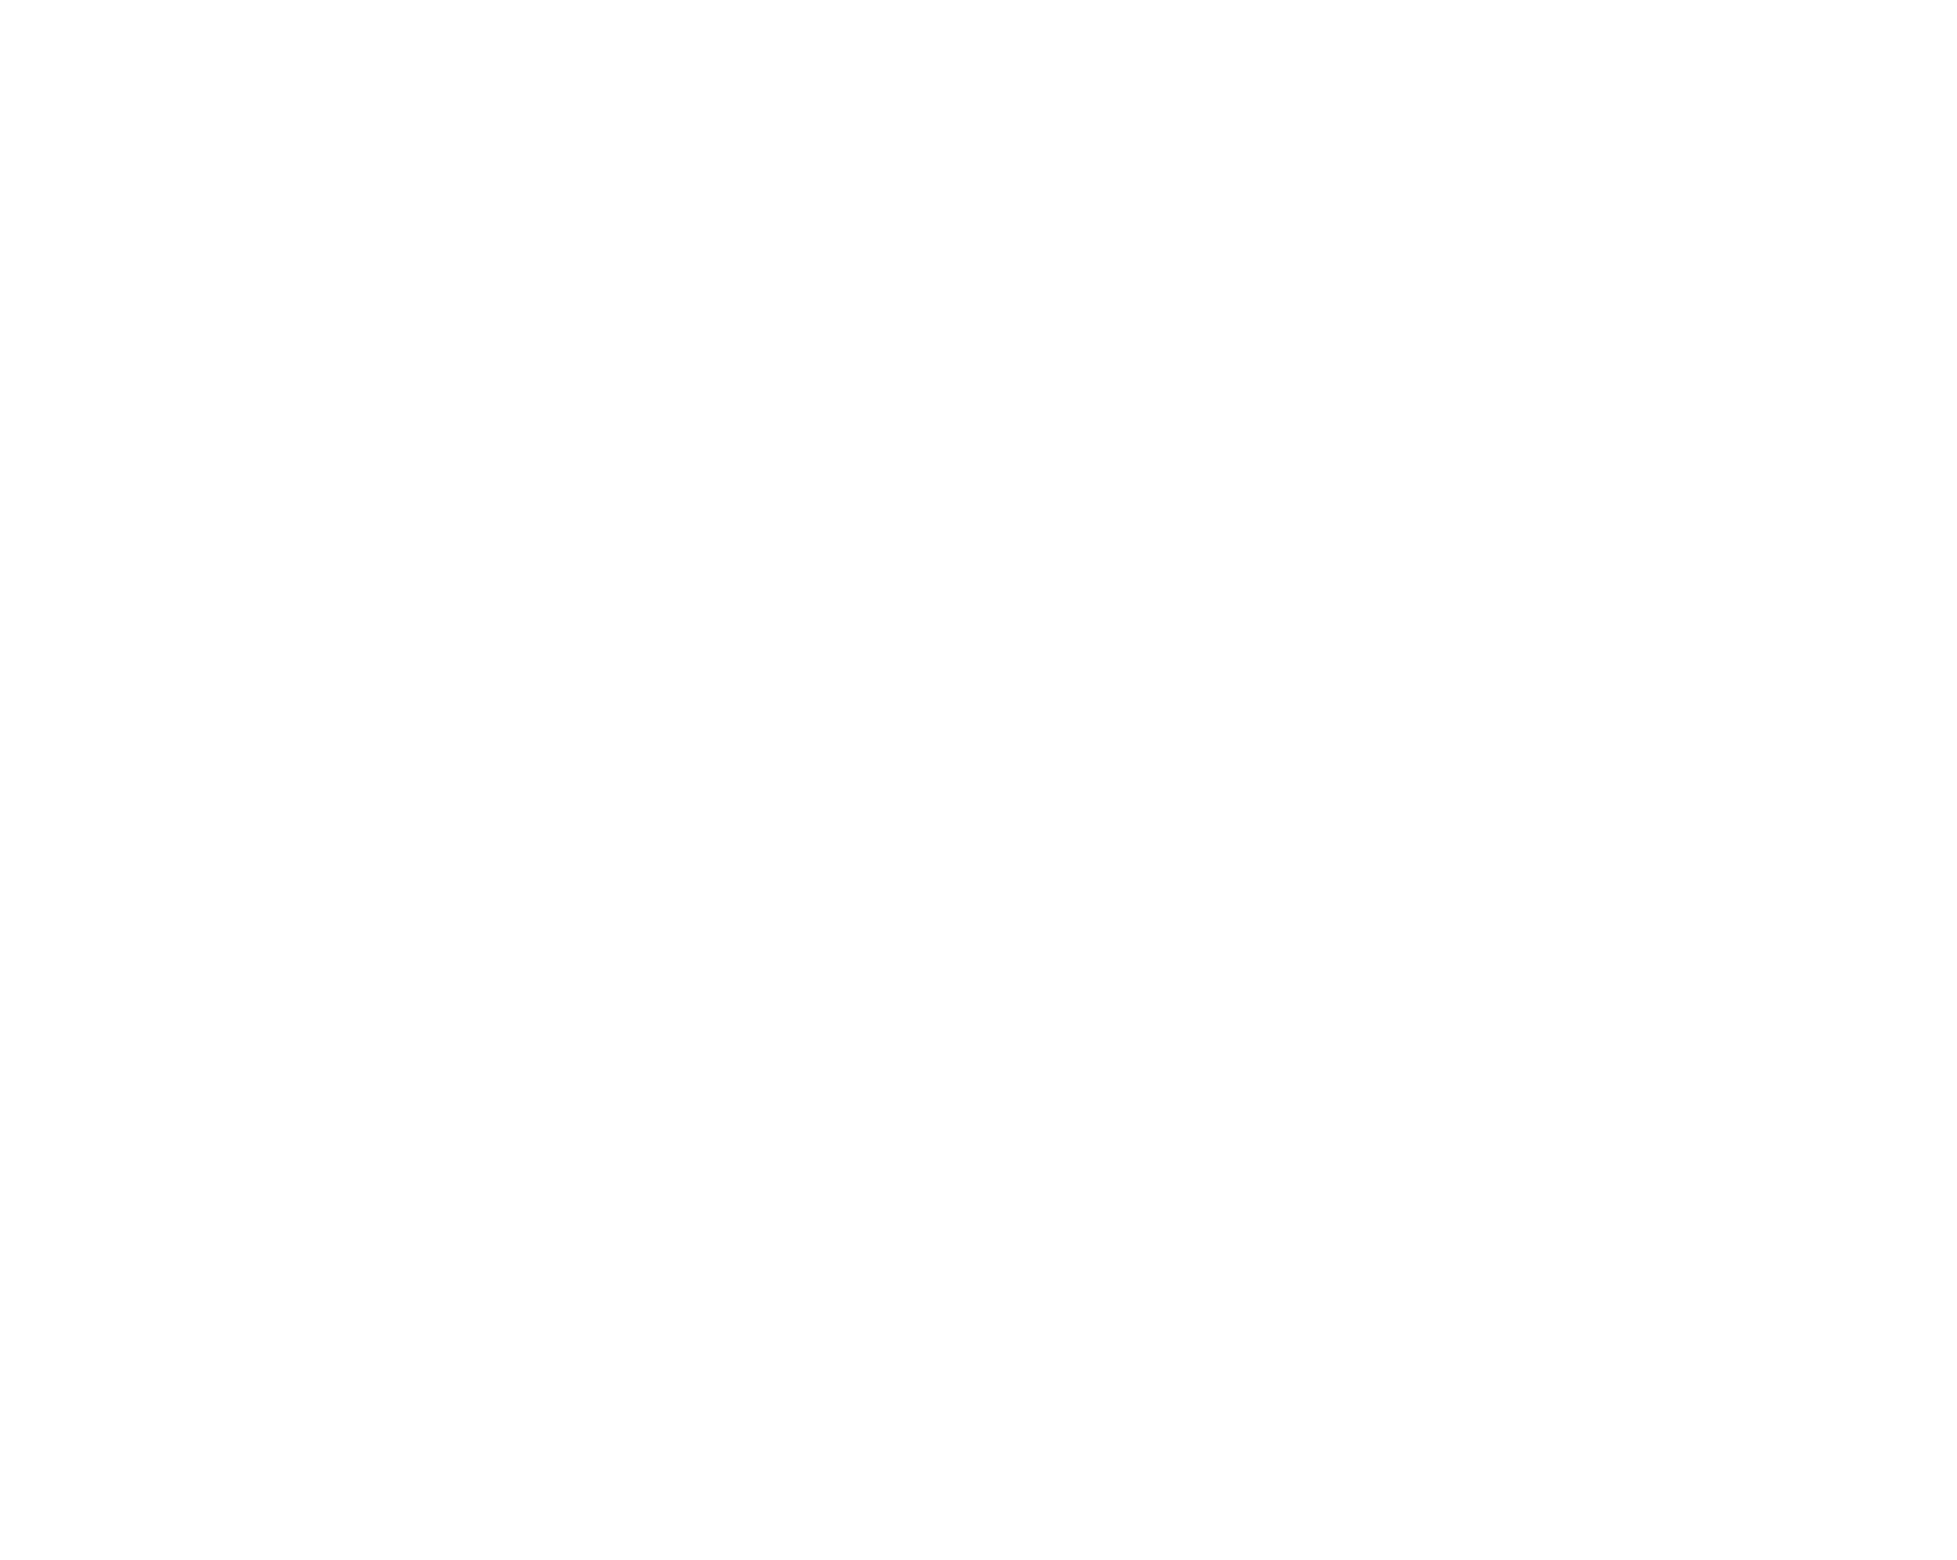

In [98]:
fig = plt.figure(figsize=(25,20))
decision_tree = tree.plot_tree(decision_tree_depth_5, feature_names=['age', 'job', 'housing', 'loan','duration', 'poutcome'],filled=True)

In [91]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_predict_max_depth_5)

roc_auc_tree = roc_auc_score(y_test, y_predict_max_depth_5)

## Random Forest Classifier

In [92]:
random_forest = RandomForestClassifier()

In [93]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_predict_forest = random_forest.predict(X_test)

In [95]:
print(classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      3260
           1       0.59      0.44      0.50      1318

    accuracy                           0.75      4578
   macro avg       0.69      0.66      0.67      4578
weighted avg       0.74      0.75      0.74      4578



In [96]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_predict_forest)

roc_auc_forest = roc_auc_score(y_test, y_predict_forest)

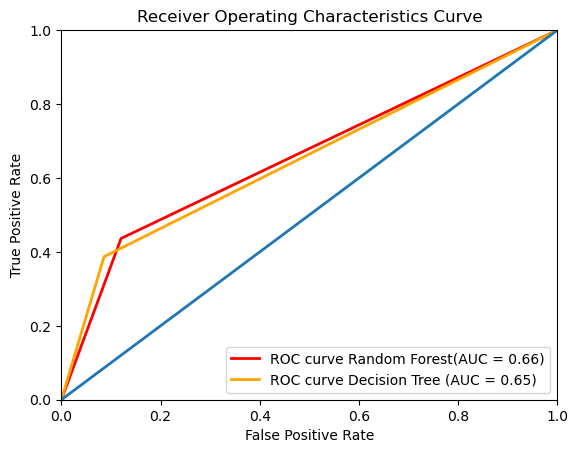

In [97]:
plt.figure()
plt.plot(fpr_forest, tpr_forest, color='red', lw=2, label='ROC curve Random Forest(AUC = %0.2f)' % roc_auc_forest)
plt.plot(fpr_tree, tpr_tree, color='orange', lw=2, label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0,1], [0,1], lw = 2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc ='lower right')
plt.show()

The above figure represents the Receiver Operating Characteristic (ROC) curves for two classifiers, a Random Forest and a Decision Tree, on the same graph. The ROC curves show the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1 - specificity) as the discrimination threshold is varied. The plot compares the performance of the Random Forest (in red) and the Decision Tree (in orange) classifiers in terms of their AUC scores, which represent the area under the ROC curve. The legend displays the AUC values for each classifier. The diagonal line represents the ROC curve of a random classifier. A classifier with good performance should have an ROC curve above this line, towards the top-left corner of the plot.